<a href="https://colab.research.google.com/github/amirmalvandi/Challenge/blob/main/NFL_Competition_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
files.upload()


Mounted at /content/drive


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amirm124","key":"f6b6e4c688d5c651409822a6935be7a0"}'}

In [3]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [6]:
! git clone https://github.com/anyelacamargo/Mask_RCNN-TF2


Cloning into 'Mask_RCNN-TF2'...
remote: Enumerating objects: 1004, done.
remote: Total 1004 (delta 0), reused 0 (delta 0), pack-reused 1004
Receiving objects: 100% (1004/1004), 125.26 MiB | 24.28 MiB/s, done.
Resolving deltas: 100% (594/594), done.


In [9]:
import os
import sys

In [10]:
os.chdir('/content/Mask_RCNN-TF2/')



In [ ]:
!pip3 install -r requirements.txt


In [ ]:
!python3 setup.py install


In [15]:
os.chdir('/content/drive/MyDrive/Kaggle/NFLcompetition')

In [ ]:
!pip install -v coco

In [ ]:

import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

In [18]:
os.chdir('/content/Mask_RCNN-TF2/')


In [20]:
ROOT_DIR = os.path.abspath("../")

In [23]:
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize


In [24]:
ROOT_DIR

'/content'

In [25]:

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "Mask_RCNN-TF2/samples/coco/"))  # To find local version
import coco

In [26]:
%matplotlib inline 


In [39]:

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "Mask_RCNN-TF2/logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "Mask_RCNN-TF2/images")


In [ ]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


In [41]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [42]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']


In [43]:
ls

assets/  images/      mask_rcnn.egg-info/  requirements.txt  setup.py
build/   LICENSE      mrcnn/               samples/
dist/    MANIFEST.in  README.md            setup.cfg


Processing 1 images
image                    shape: (428, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


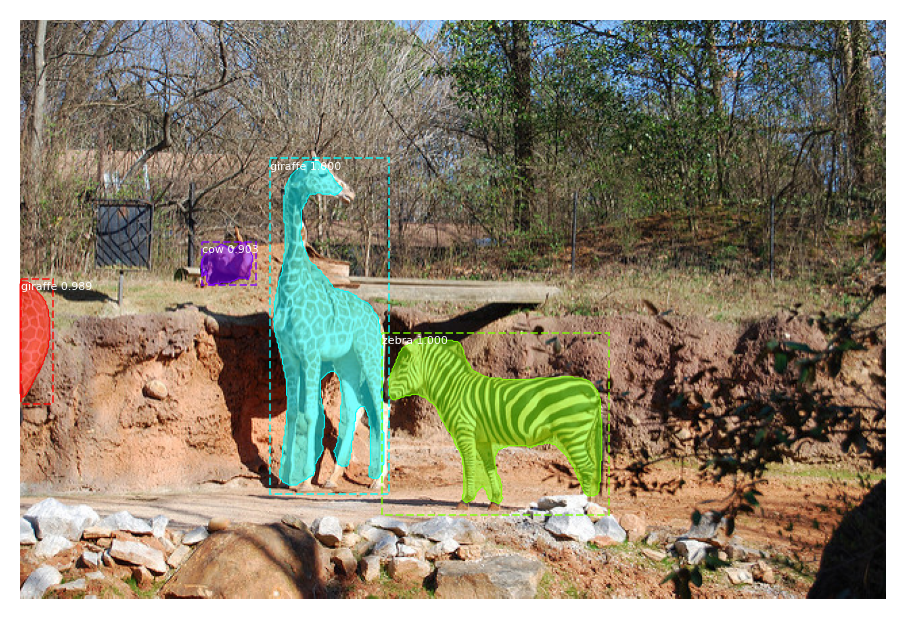

In [48]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
